In [7]:
library(jsonlite)
library(ggmap)
library(ggplot2)
library(raster)
library(MASS)
library(geosphere)

In [8]:
setwd("/home/hduser1/Yelp")

In [9]:
food = stream_in(file("biz_food.json"))
byState = split(food, f=food$state)

opening file input connection.


 Imported 60702 records. Simplifying...


closing file input connection.


In [10]:
generate_density_map = function(city_food) {
  p = get_map(location = c(median(city_food$longitude), median(city_food$latitude)), maptype = "roadmap", zoom = 12)
  m = ggmap(p) + geom_density2d(data = city_food, aes(x = longitude, y = latitude), stat = "density2d", show.legend = F) + 
    geom_point(data = city_food, aes(x= median(longitude), y = median(latitude), color = "yellow"), stat = 'identity', alpha = 1) +
    geom_point(data = city_food, aes(x= mean(longitude), y = mean(latitude), color = "green"), stat = 'identity', alpha = 1) +  
    geom_point(data = city_food, aes(x= longitude, y = latitude, color = "orange"), stat = 'identity', size = 0.01, alpha = 1) + 
    ggtitle(unique(city_food$state))
  return(m)
}

In [11]:
for (i in 1:9) {
  byState[[i]] = byState[[i]][which(!is.na(byState[[i]]$longitude)),]
}
maps = lapply(byState, generate_density_map)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=33.48049,-111.97732&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.11149,-88.24197&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=35.21977,-80.84003&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=36.11789,-115.17198&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=41.45816,-81.68406&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=43.671055,-79.402815&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Map from URL : http://maps.googleapi

Warning message:
“Removed 9516 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 9516 rows containing missing values (geom_point).”

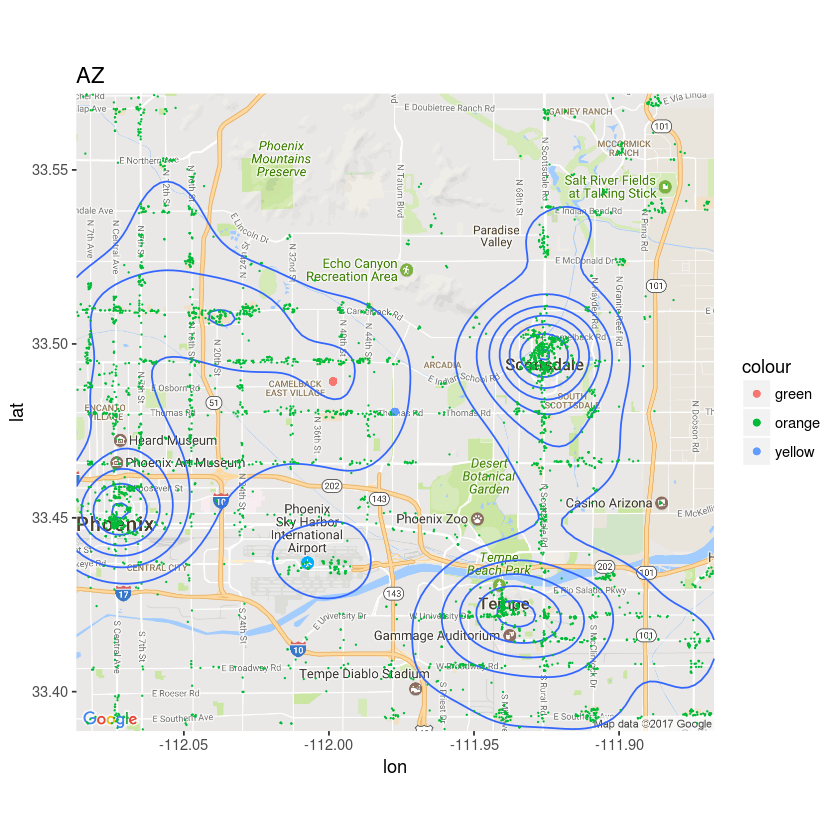

In [26]:
maps[[1]]

Warning message:
“Removed 95 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 95 rows containing missing values (geom_point).”

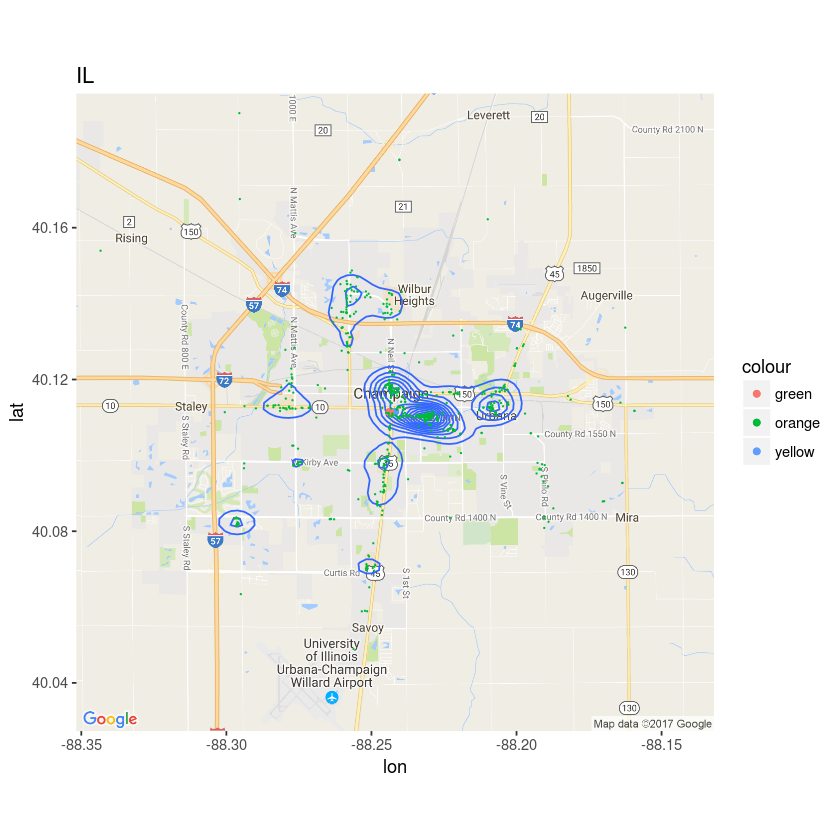

In [30]:
maps[[2]]

Warning message:
“Removed 2508 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2508 rows containing missing values (geom_point).”

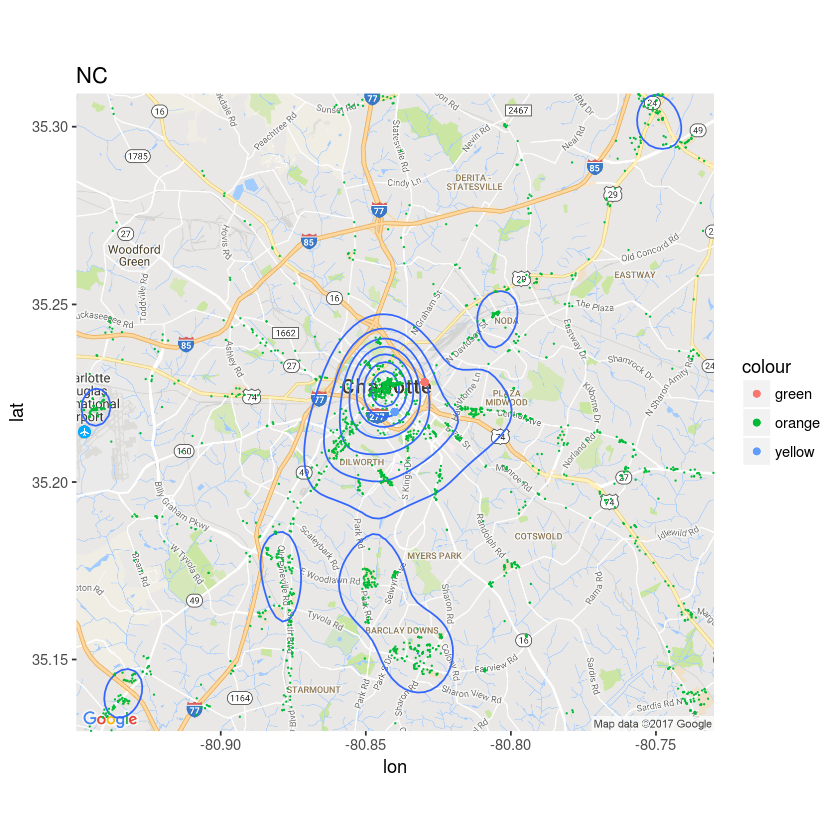

In [31]:
maps[[3]]

Warning message:
“Removed 3287 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 3287 rows containing missing values (geom_point).”

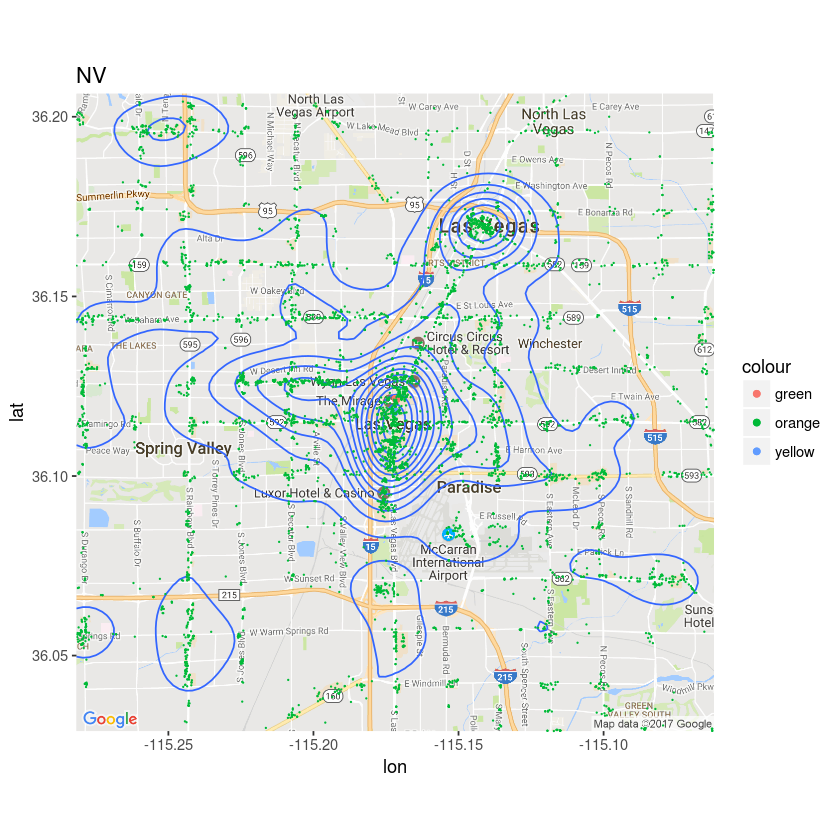

In [32]:
maps[[4]]

Warning message:
“Removed 3999 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 3999 rows containing missing values (geom_point).”

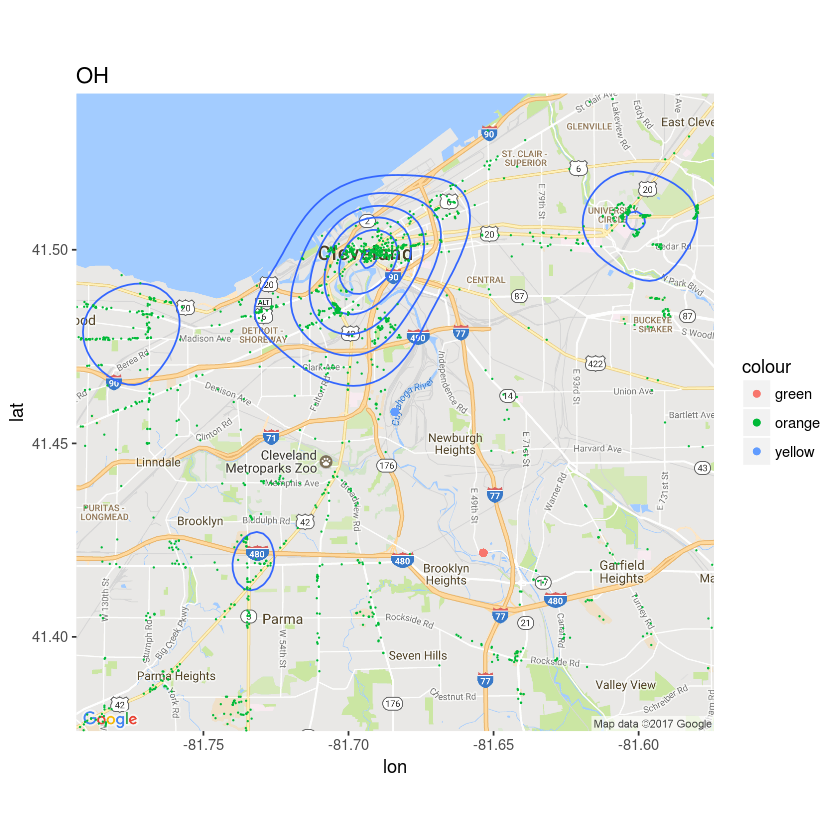

In [33]:
maps[[5]]

Warning message:
“Removed 7565 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 7565 rows containing missing values (geom_point).”

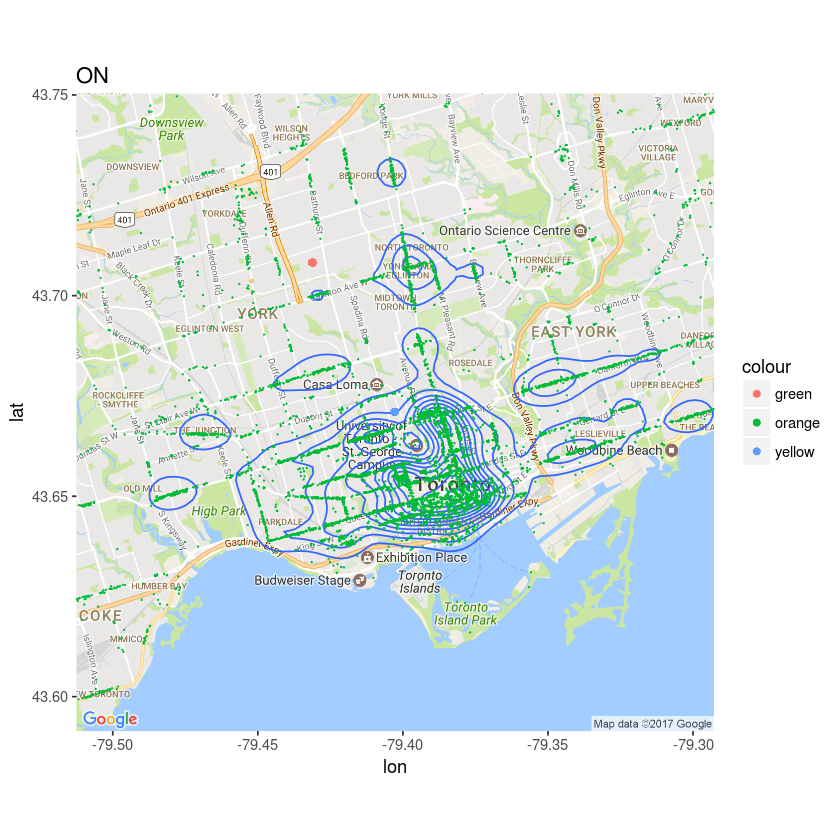

In [34]:
maps[[6]]

Warning message:
“Removed 1790 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 1790 rows containing missing values (geom_point).”

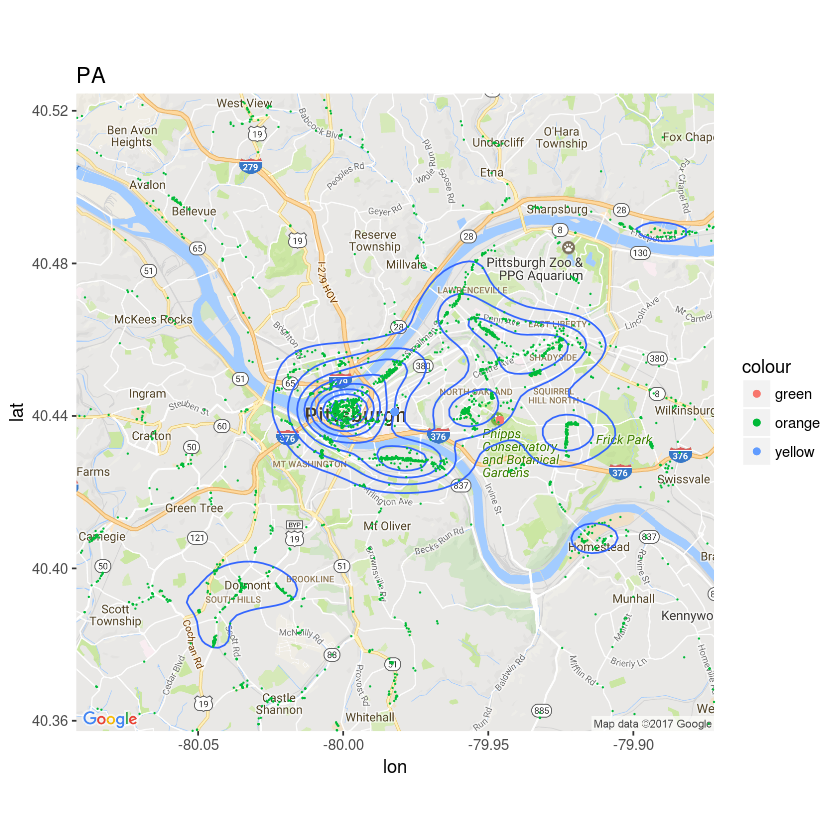

In [35]:
maps[[7]]

Warning message:
“Removed 1098 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 1098 rows containing missing values (geom_point).”

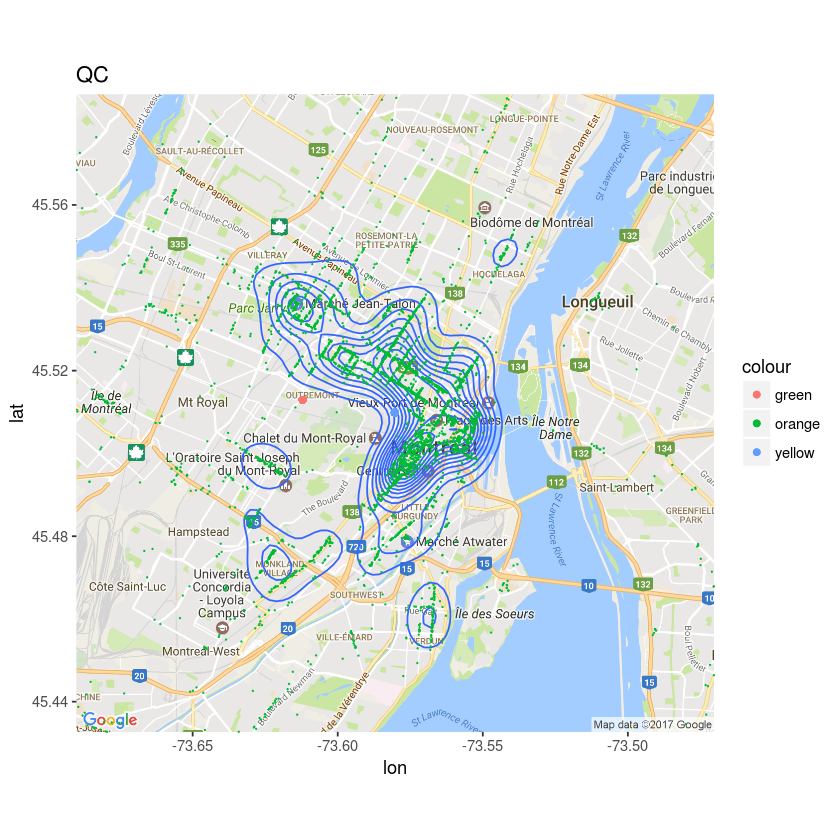

In [36]:
maps[[8]]

Warning message:
“Removed 536 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 536 rows containing missing values (geom_point).”

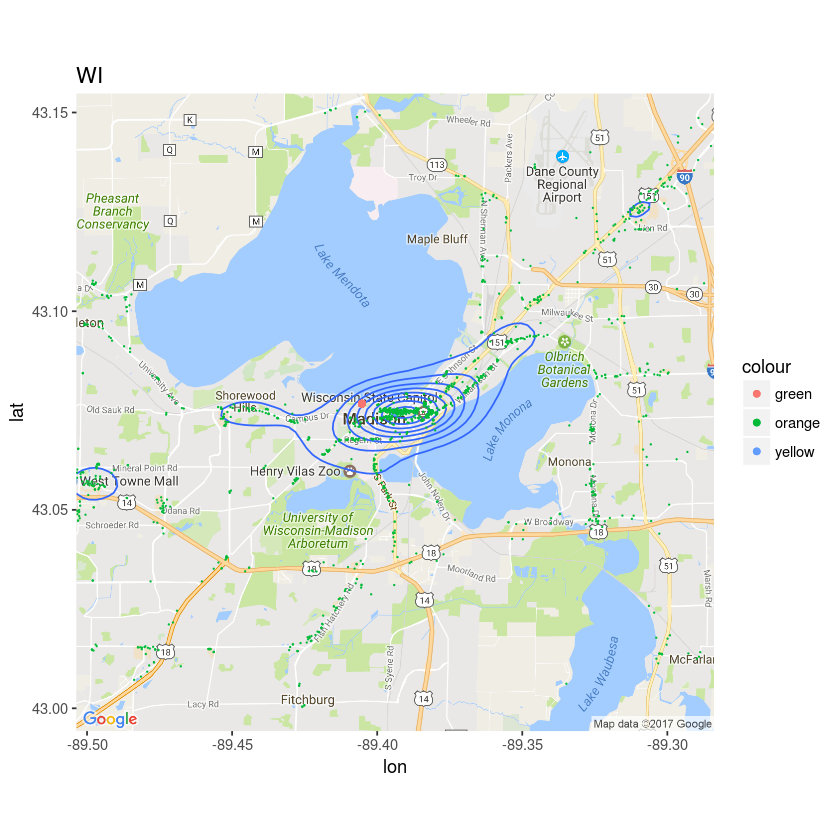

In [37]:
maps[[9]]

In [40]:
library(dbscan)